In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

from geo_scripts.process_height import *

/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
et = np.load("./data/effective_temperature_large.npy")

In [24]:
large_tpt = et > 11
geot = (-180.00013888885002, 0.0083333333, 0.0, 83.99986041515001, 0.0, -0.0083333333)
ag_tpt = aggregate_globe_with_geot(large_tpt, geot)
mask = np.load("./data/underwater_mask.npy")
ag_tpt[mask] = np.ma.masked

In [30]:
tpt = ag_tpt > .75
tpt25 = ag_tpt > .25
tpt = tpt25
diff = tpt ^ tpt25
plt.imshow(tpt25)

In [31]:
river = np.load("./data/river.npy")
desert = np.load("./data/desert.npy")
# tpt = np.load("./data/terrestrial_plant_threshold.npy")
mask = np.load("./data/underwater_mask.npy")
steppes = np.load("./data/steppes.npy")

In [32]:
agriculture = tpt & (desert == False) | (river & tpt)
m_ag = np.ma.array(agriculture, mask=mask)

In [33]:
overlap = steppes & agriculture
m_overlap = np.ma.array(overlap, mask=mask)

<IPython.core.display.Javascript object>


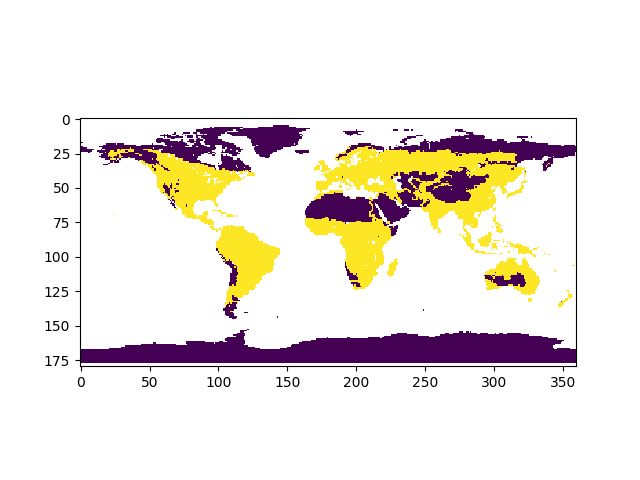

In [34]:
plt.imshow(m_ag)